# 学习形状识别


## 目标

* 了解直方图的概念
* 了解傅里叶变换

## 01. 知识点


### 1.1 直方图

在统计学中，直方图是一种对数据分布情况的图形表示，是一种二维统计图表，他的两个坐标分别是统计样本（图像、视频帧）和样本的某种属性（亮度，像素值，梯度，方向，色彩等等任何特征）。直方图是对数据的统计，并把统计值显示到事先设定好的矩形条中，矩形条中的数值是从数据中计算出的特征的统计量。总之，直方图获取的是数据分布的统计图，通常直方图的维数要低于原始数据。

图像直方图是用一表示数字图像中亮度分布的直方图，绘制了图像中每个亮度值的像素数。可以借助观察该直方图了解需要如何调整亮度分布的直方图。这种直方图中，横坐标的左侧为纯黑、较暗的区域，而右侧为较亮、纯白的区域。因此，一张较暗图片的图像直方图中的数据多集中于左侧和中间部分，而整体明亮、只有少量阴影的图像则相反。计算机视觉邻域常借助图像直方图来实现图像的二值化。

直方图广泛应用于许多计算机视觉应用中。通过标记帧和帧之间显著的边缘和颜色的统计变化，来检测视频中场景的变换。通过在每个兴趣点设置一个有相近特征的直方图所构成的标签，用以确定图像中的兴趣点。边缘、色彩、角度等直方图构成了可以被传递给目标识别分类器的一个通用特征类型。色彩和边缘的直方图还可以用来识别网络视频是否被复制等。直方图是计算机视觉中最经典的工具之一，也是一个很好的图像特征表示手段。  

如果有一幅图像只有9个像素点，存在1、2、3、4、5，共5个灰度级。每个灰度级出线的次数分别为3,1,2,1,2。那么绘制直方图时， 将灰度级作为x轴处理，该灰度级出现的次数作为y轴处理。可以得出：x轴的数据为x=\[1 2 3 4 5\]，y轴的数据为y=\[3 1 2 1 2\]。

根据上述关系，可以绘制出如下图所示的折线图（左图）和直方图（右图）。一般情况下，我们把左侧的直线图和右侧直方图都称为直方图。


<div style="float:left;border:solid 1px 000;margin:2px;"><img src="../pic/chapter7_1.png"  width="400" height="400" ></div>
<div style="float:none;clear:both;"></div> 

### 1.2 归一化直方图

在实际处理中，图像直方图的x轴区间一般是\[0,255\]，对应的是8位位图的256个灰度级；y轴对应的是具有相应灰度级的像素点的个数。有些灰度图像的像素并没有分布在 \[0,255\] 内，而是分布在 \[0,255\] 的子区间内如分布在\[10,155\]。这样的图像肉眼看上去往往不是很清晰。我们可以通过直方图归一化的方式，将它的像素分布从 \[0,255\] 的子区间变为 \[0,255\] 范围内。通过这样的方式，往往可以增加图像的清晰度。

在归一化直方图中，x轴仍然表示灰度级；y轴不再表示灰度级出现的次数，而是灰度级出现的频率。

针对上图，统计各个灰度级出现的频率：灰度级出现的频率=灰度级出现的次数/总像素数。在图中共有9个像素，所以统计结果为3/9,1/9,2/9,1/9,2/9。

在归一化直方图中，各个灰度级出现的频率之和为1，如3/9+1/9+2/9+1/9+2/9 = 1。

在绘制直方图时，将灰度级作为x轴数据处理，将其出现的频率作为y轴数据处理，所以x轴的数据为x=\[1 2 3 4 5\]，y轴的数据为y=\[3/9 1/9 2/9 1/9 2/9\]。

根据上述关系，可以绘制出如图所示的归一化直方图。可以看到，归一化直方图与直方图在外观上是一致的，只是y轴的标签不同而已

<div style="float:left;border:solid 1px 000;margin:2px;"><img src="../pic/chapter7_2.png"  width="400" height="400" ></div>
<div style="float:none;clear:both;"></div> 

在OpenCV的官网上，特别提出了要注意三个概念：**DIMS、BINS、RANGE**。

* DIMS：表示在绘制直方图时，收集的参数的数量。一般情况下，直方图中收集的数据只有一种，就是灰度级。因此，该值为1。
* RANGE：表示要统计的灰度级范围，一般为[0,255]。0对应的是黑色，255对应的是白色。
* BINS：参数子集的数目。在处理数据的过程中，有时需要将众多的数据划分为若干个组，再进行分析。

针对前图的灰度级，你可能希望将两个像素值作为一组讨论。这样，整个灰度级被划分为三组，具体为{ {1,2} ,{3,4} ,{5} }。如图所示的是划分前后的直方图情况。

<div style="float:left;border:solid 1px 000;margin:2px;"><img src="../pic/chapter7_3.png"  width="400" height="400" ></div>
<div style="float:none;clear:both;"></div> 


### 1.3 傅里叶变换

图像处理一般分为空间域处理和频率域处理。

空间域处理是直接对图像内的像素进行处理。空间域处理主要划分为灰度变换和空间滤波两种形式。灰度变换是对图像内的单个像素进行处理，比如调节对比度和处理阈值等。空间滤波涉及图像质量的改变，例如图像平滑处理。空间域处理的计算简单方便，运算速度更快。

频率域处理是先将图像变换到频率域，然后在频率域对图像进行处理，最后再通过反变换将图像从频率域变换到空间域。傅里叶变换是应用最广泛的一种频域变换，它能够将图像从空间域变换到频率域，而逆傅里叶变换能够将频率域信息变换到空间域内。傅里叶变换在图像处理领域内有着非常重要的作用。

对图像进行傅里叶变换后，我们会得到图像中的低频和高频信息。低频信息对应图像内变化缓慢的灰度分量。高频信息对应图像内变化越来越快的灰度分量，是由灰度的尖锐过渡造成的。例如，在一幅大草原的图像中有一头狮子，低频信息就对应着广袤的颜色趋于一致的草原等细节信息，而高频信息则对应着狮子的轮廓等各种边缘及噪声信息。

傅里叶变换的目的，就是为了将图像从空域转换到频域，并在频域内实现对图像内特定对象的处理，然后再对经过处理的频域图像进行逆傅里叶变换得到空域图像。傅里叶变换在图像处理领域发挥着非常关键的作用，可以实现图像增强、图像去噪、边缘检测、特征提取、图像压缩和加密等。



## 02 绘制直方图

Python的模块matplotlib.pyplot中的hist（）函数能够方便地绘制直方图，我们通常采用该函数直接绘制直方图。除此以外，OpenCV中的cv2.calcHist（）函数能够计算统计直方图并在此基础上绘制图像的直方图。

**matplotlib.pyplot** 提供了一个类似于 MATLAB 绘图方式的框架，可以使用其中的**matplotlib.pyplot.hist（）**方法来绘制直方图。该方法的语法格式为：**matplotlib.pyplot.hist（X,BINS）**

式中：

 - X：数据源，必须是一维的。图像通常是二维的，需要使用ravel（）函数将图像处理为一维数据源以后，再作为参数使用。
 - BINS:BINS的具体值，表示灰度级的分组情况。 

函数ravel（）的作用是将二维数组降维成一维数组。例如，有图像a，其值为：

<div style="float:left;border:solid 1px 000;margin:2px;"><img src="../pic/chapter7_4.png"  width="400" height="400" ></div>
<div style="float:none;clear:both;"></div> 

使用函数ravel（）对a进行处理，b=a.ravel（），可以得到b为：

<div style="float:left;border:solid 1px 000;margin:2px;"><img src="../pic/chapter7_5.png"  width="400" height="400" ></div>
<div style="float:none;clear:both;"></div> 

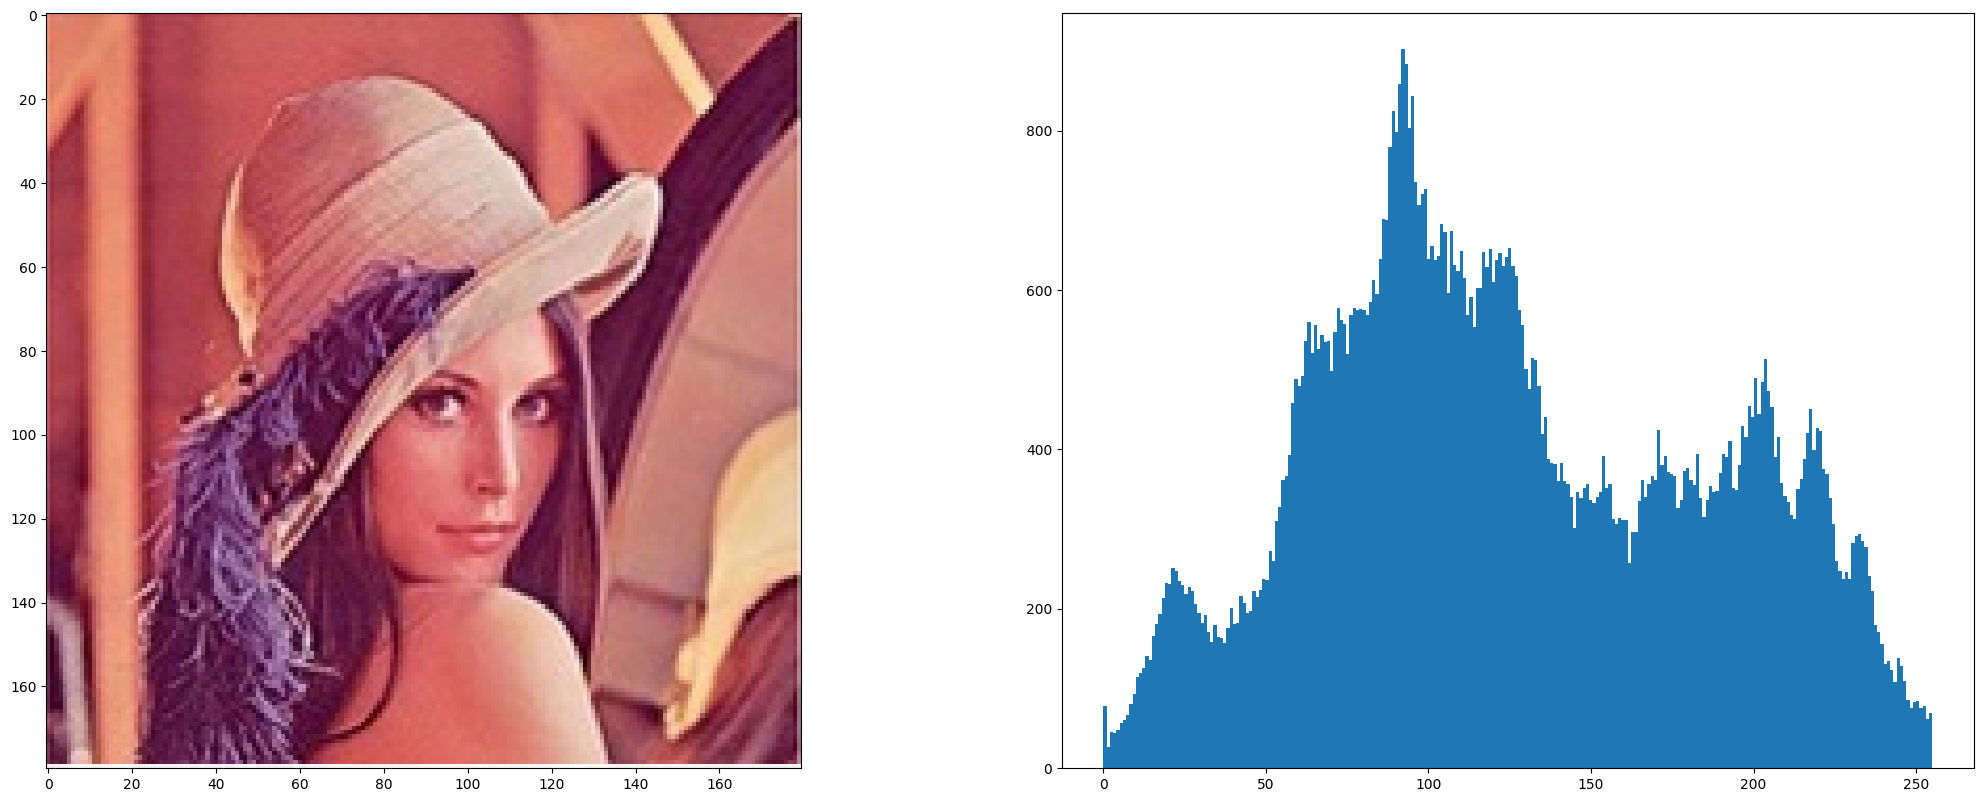

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("../pic/pic4.png")

equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(40,10), dpi=100)
plt.subplot(131)
plt.imshow(equal)

plt.subplot(132)
plt.hist(image.ravel(),256)

plt.show()


OpenCV提供了函数**cv2.calcHist（）**用来计算图像的统计直方图，该函数能统计各个灰度级的像素点个数。利用matplotlib.pyplot模块中的**plot（）**函数，可以将函数cv2.calcHist（）的统计结果绘制成直方图。该方法的语法格式为：
**hist=cv2.calcHist（images,channels,mask,histSize,ranges,accumulate）**
式中：
 - hist：返回的统计直方图，是一个一维数组，数组内的元素是各个灰度级的像素个数。
 - images：原始图像，该图像需要使用“\[\]”括起来。
 - channels：指定通道编号。通道编号需要用“\[\]”括起来，如果输入图像是单通道灰度图像，该参数的值就是[0]。对于彩色图像，它的值可以是\[0\]、\[1\]、\[2\]，分别对应通道B、G、R。
 - mask：掩模图像。当统计整幅图像的直方图时，将这个值设为None。当统计图像某一部分的直方图时，需要用到掩模图像。
 - histSize:BINS的值，该值需要用“\[\]”括起来。例如，BINS的值是256，需要使用“\[256\]”作为此参数值。
 - ranges：即像素值范围。例如，8位灰度图像的像素值范围是\[0,255\]。
 - accumulate：累计（累积、叠加）标识，默认值为False。如果被设置为True，则直方图在开始计算时不会被清零，计算的是多个直方图的累积结果，用于对一组图像计算直方图。该参数允许从多个对象中计算单个直方图，或者实时更新直方图。该参数是可选的，一般情况下不需要设置。

使用matplotlib.pyplot模块内的plot（）函数，可以将函数cv2.calcHist（）的返回值绘制为图像直方图。该方法的语法格式为：
**plot(\*args, \*\*kwargs)**
- args是可变参数，可以是x,y，以及格式化的字符串的多种组合。x是输入值，y是输出值，还可以有一个字符串来定义图的基本属性如：颜色（color），点型（marker），线型（linestyle）。

颜色：

<div style="float:left;border:solid 1px 000;margin:2px;"><img src="../pic/chapter7_6.png"  width="400" height="400" ></div>
<div style="float:none;clear:both;"></div> 

点型参数**Markers**,如：marker='+' 这个只有简写，英文描述不被识别。

<div style="float:left;border:solid 1px 000;margin:2px;"><img src="../pic/chapter7_7.png"  width="400" height="400" ></div>
<div style="float:none;clear:both;"></div> 

线型参数**Line Styles**，linestyle='-'。

<div style="float:left;border:solid 1px 000;margin:2px;"><img src="../pic/chapter7_8.png"  width="400" height="400" ></div>
<div style="float:none;clear:both;"></div> 

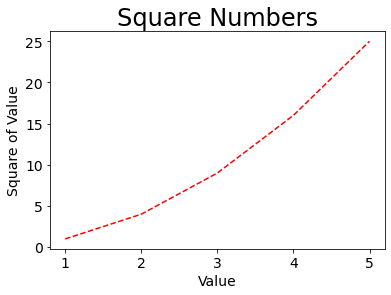

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#图形输入值
input_values = [1,2,3,4,5]
#图形输出值
squares = [1,4,9,16,25]

#plot根据列表绘制出有意义的图形，linewidth是图形线宽，可省略
plt.plot(input_values,squares,'r',linestyle='--')
#设置图标标题
plt.title("Square Numbers",fontsize = 24)
#设置坐标轴标签
plt.xlabel("Value",fontsize = 14)
plt.ylabel("Square of Value",fontsize = 14)
#设置刻度标记的大小
plt.tick_params(axis='both',labelsize = 14)
#打开matplotlib查看器，并显示绘制图形
plt.show()

## 03 plot图像应用

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("../pic/pic4.png")
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

#使用calcHist计算图像的统计直方图。灰度图像只有一个通道所以使用[0]，没有掩模图像所以第三个参数为None,第四个参数使用256，
#第五个参数设置了像素值的范围为0到256。
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
plt.plot(hist,color='r')

plt.show()

## 04 使用掩模绘制直方图

如下例子运行后可以看到红色为没有掩模的直方图，蓝色为增加了掩模的直方图。

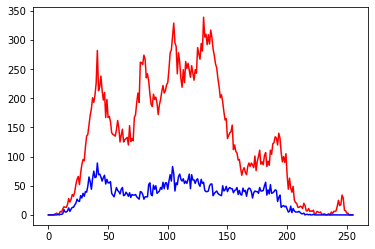

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("../pic/pic4.png")
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

#使用numpy创建掩模图像初始化为0，并在第11行把中间部位90*90区间设置为255。
mask = np.zeros(gray.shape,np.uint8)
mask[45:135,45:135]=255

#使用calcHist方法计算图像的统计直方图没有掩模图像
hist = cv2.calcHist([gray],[0],None,[256],[0,255])
#使用calcHist方法并设置掩模图像计算图像的统计直方图。
histMask = cv2.calcHist([gray],[0],mask,[256],[0,255])
plt.plot(hist,color='r')
plt.plot(histMask,color='b')
plt.show()

## 05 直方图均衡化

如果一幅图像拥有全部可能的灰度级，并且像素值的灰度均匀分布，那么这幅图像就具有高对比度和多变的灰度色调，灰度级丰富且覆盖范围较大。在外观上，这样的图像具有更丰富的色彩，不会过暗或过亮。所以对于过暗或过亮的图像使用均衡化处理可以得到外观鲜明的图像。如下图右侧为均衡化后的图像。

<div style="float:left;border:solid 1px 000;margin:2px;"><img src="../pic/chapter7_9.png"  width="400" height="400" ></div>
<div style="float:none;clear:both;"></div> 

直方图均衡化的主要目的是将原始图像的灰度级均匀地映射到整个灰度级范围内，得到一个灰度级分布均匀的图像。这种均衡化，既实现了灰度值统计上的概率均衡。

OpenCV提供了方法**cv2.equalizeHist（）**实现直方图均衡化，该方法的语法格式为：**dst=cv2.equalizeHist（src）**

式中：

 - dst是直方图均衡化处理的结果。
 - src是8位单通道原始图像。
 



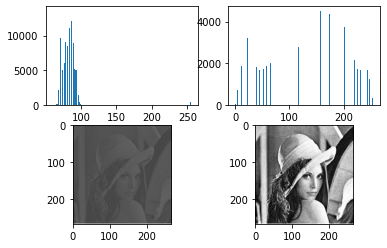

In [26]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("../pic/picjunheng.png")
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
equal = cv2.equalizeHist(gray)

plt.figure("image")
plt.subplot(221)
plt.hist(image.ravel(),256)
plt.subplot(222)
plt.hist(equal.ravel(),256)

plt.subplot(223)
plt.imshow(image)
plt.subplot(224)
equal = cv2.cvtColor(equal,cv2.COLOR_BGR2RGB)
plt.imshow(equal)

plt.show()

第一排第一个原图的直方图，第一排第二个为原图均衡化后的直方图

## 06 傅里叶变换

在OpenCV中提供了方法**cv2.dft**实现傅里叶变换，该方法的语法格式为：返回结果=cv2.dft（原始图像，转换标识）

对于参数**“原始图像”**，要首先使用np.float32（）函数将图像转换成np.float32格式。“**转换标识**”的值通常为“cv2.DFT_COMPLEX_OUTPUT”，用来输出一个复数阵列。

经过函数 cv2.dft（）的变换后，我们得到了原始图像的频谱信息。此时，零频率分量并不在中心位置，为了处理方便需要将其移至中心位置，可以用函数numpy.fft.fftshift（）实现。经过上述处理后，频谱图像还只是一个由实部和虚部构成的值。要将其显示出来，还要使用方法**cv2.magnitude（）**可以计算频谱信息的幅度。

该方法的语法格式为：**返回值=cv2.magnitude（参数1，参数2）**

参数1：浮点型x坐标值，也就是实部。参数2：浮点型y坐标值，也就是虚部，它必须和参数1具有相同的大小（size值的大小，不是value值的大小）。

在OpenCV中提供了方法**cv2.idft**实现逆傅里叶变换，该方法是傅里叶变换函数**cv2.dft（）**的逆方法，该方法的语法格式为：
**返回结果=cv2.idft（原始数据）**

对图像进行傅里叶变换后，通常会将零频率分量移至频谱图像的中心位置。如果使用函数**numpy.fft.fftshift（）**移动了零频率分量，那么在进行逆傅里叶变换前，要使用函数**numpy.fft.ifftshift（）**将零频率分量恢复到原来位置。

还要注意，在进行逆傅里叶变换后，得到的值仍旧是复数，需要使用函数**cv2.magnitude（）**计算其幅度。
   

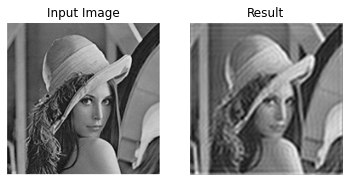

In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('../pic/gray.png',0)
img_float32 = np.float32(img)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

#低通滤波
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)# 中心位置
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.axis('off')
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.axis('off')
plt.show()


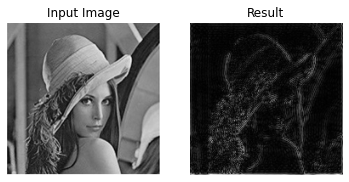

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('../pic/gray.png',0)
img_float32 = np.float32(img)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

#高通滤波
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)# 中心位置
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.axis('off')
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.axis('off')
plt.show()